 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# Reading whale returns
whale_df = pd.read_csv('whale_returns.csv')
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [4]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df=whale_df.dropna().copy()
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [7]:
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [8]:
whale_df = whale_df.set_index(pd.to_datetime(whale_df["Date"], infer_datetime_format=True))
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [9]:
whale_df = whale_df.drop(columns=["Date"])
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [10]:
# Reading algorithmic returns
algo_df = pd.read_csv('algo_returns.csv')
algo_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [11]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
algo_df=algo_df.dropna().copy()
algo_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [13]:
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [14]:
algo_df.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


In [15]:
algo_df.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [16]:
algo_df.describe(include="all")

,Date,Algo 1,Algo 2
count,1235,1235.000000,1235.000000
unique,1235,NaN,NaN
top,2014-06-05,NaN,NaN
freq,1,NaN,NaN
mean,NaN,0.000654,0.000341
std,NaN,0.007988,0.008466
min,NaN,-0.030951,-0.036937
25%,NaN,-0.003252,-0.003733
50%,NaN,0.000094,0.000581
75%,NaN,0.003901,0.005194


In [17]:
algo_df = algo_df.set_index(pd.to_datetime(algo_df["Date"], infer_datetime_format=True))
algo_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761


In [18]:
algo_df = algo_df.drop(columns=["Date"])
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [19]:
# Reading S&P TSX 60 Closing Prices
sp_df = pd.read_csv('sp_tsx_history.csv')
sp_df

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"
...,...,...
1813,20-Dec-2019,"$17,118.44"
1814,23-Dec-2019,"$17,128.71"
1815,24-Dec-2019,"$17,180.15"
1816,27-Dec-2019,"$17,168.21"


In [20]:
# Check Data Types
sp_df.dtypes

Date     object
Close    object
dtype: object

In [21]:
# Fix Data Types
sp_df["Close"] = sp_df["Close"].str.replace("$", "")
sp_df["Close"] = [float(str(i).replace(",", "")) for i in sp_df["Close"]]
sp_df["Close"]

/Users/adeife/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0       12370.19
1       12391.23
2       12359.47
3       12447.68
4       12418.99
          ...   
1813    17118.44
1814    17128.71
1815    17180.15
1816    17168.21
1817    17098.56
Name: Close, Length: 1818, dtype: float64

In [22]:
sp_df["Close"] = sp_df["Close"].astype("float")
sp_df.dtypes

Date      object
Close    float64
dtype: object

In [23]:
sp_df = sp_df.set_index(pd.to_datetime(sp_df["Date"], infer_datetime_format=True))
sp_df.head()

,Date,Close
Date,,
2012-10-01,1-Oct-2012,12370.19
2012-10-02,2-Oct-2012,12391.23
2012-10-03,3-Oct-2012,12359.47
2012-10-04,4-Oct-2012,12447.68
2012-10-05,5-Oct-2012,12418.99


In [24]:
sp_df = sp_df.drop(columns=["Date"])
sp_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [25]:
# Calculate Daily Returns
daily_returns_sp = sp_df.pct_change()
daily_returns_sp.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [26]:
# Drop nulls
daily_returns_sp=daily_returns_sp.dropna().copy()
daily_returns_sp

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [27]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp.rename(columns={'Close': 'S&P TSX'}, inplace=True)
daily_returns_sp

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [28]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
daily_return1 = pd.concat(
    [whale_df, algo_df, daily_returns_sp], axis="columns", join="inner"
)
daily_return1.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

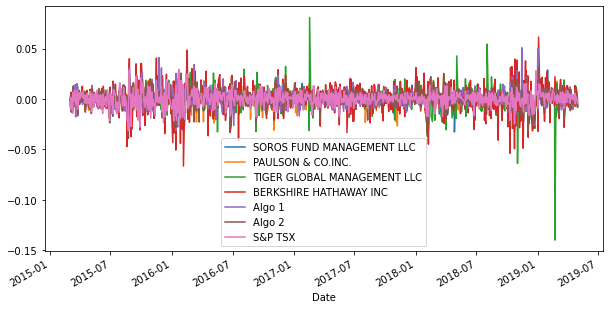

In [29]:
# Plot daily returns of all portfolios
daily_return1.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

In [30]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_return1).cumprod() - 1
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:xlabel='Date'>

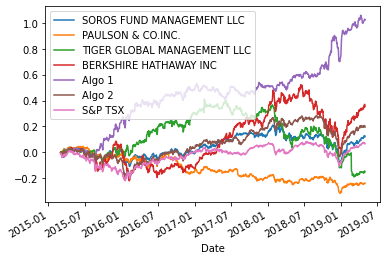

In [31]:
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

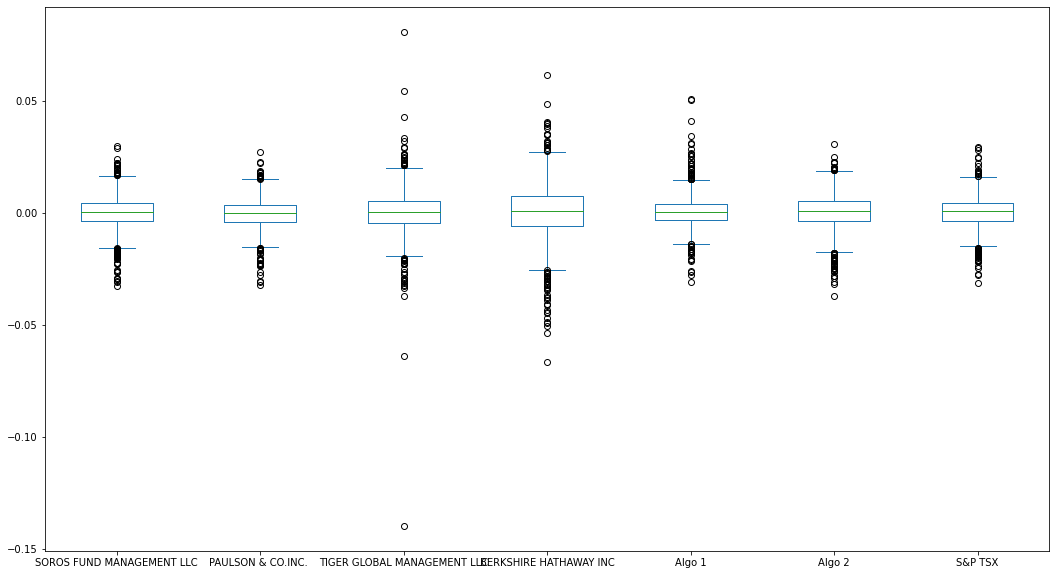

In [32]:
# Box plot to visually show risk
daily_return1.plot.box(figsize=(18,10))

### Calculate Standard Deviations

In [33]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_return1.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [34]:
# Determine which portfolios are riskier than the S&P TSX 60
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
dtype: float64

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_return1.rolling(window=21).std()
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:xlabel='Date'>

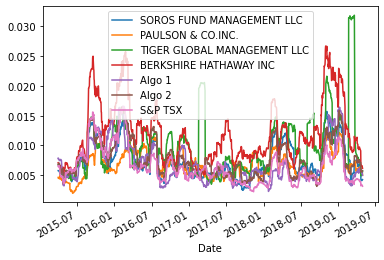

In [37]:
# Plot the rolling standard deviation
daily_return1.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [38]:
# Calculate the correlation
correlation = daily_return1.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

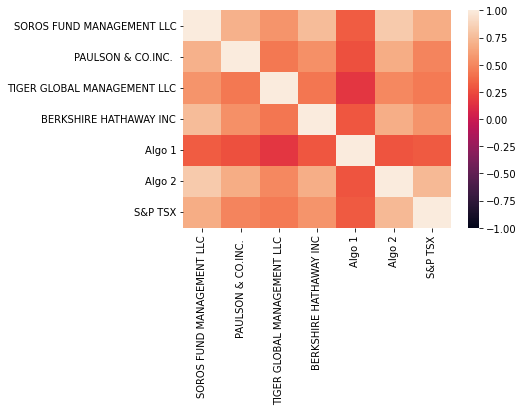

In [39]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [40]:
# Calculate covariance of a Algo 2
rolling_covariance = daily_return1['Algo 2'].rolling(window=60).cov(daily_return1['S&P TSX'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Length: 1029, dtype: float64

In [41]:
# Calculate variance of S&P TSX
rolling_variance = daily_return1['S&P TSX'].rolling(window=60).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64

In [42]:
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    1.014041
2019-04-26    1.014918
2019-04-29    0.991566
2019-04-30    1.008943
2019-05-01    1.020958
Length: 1029, dtype: float64

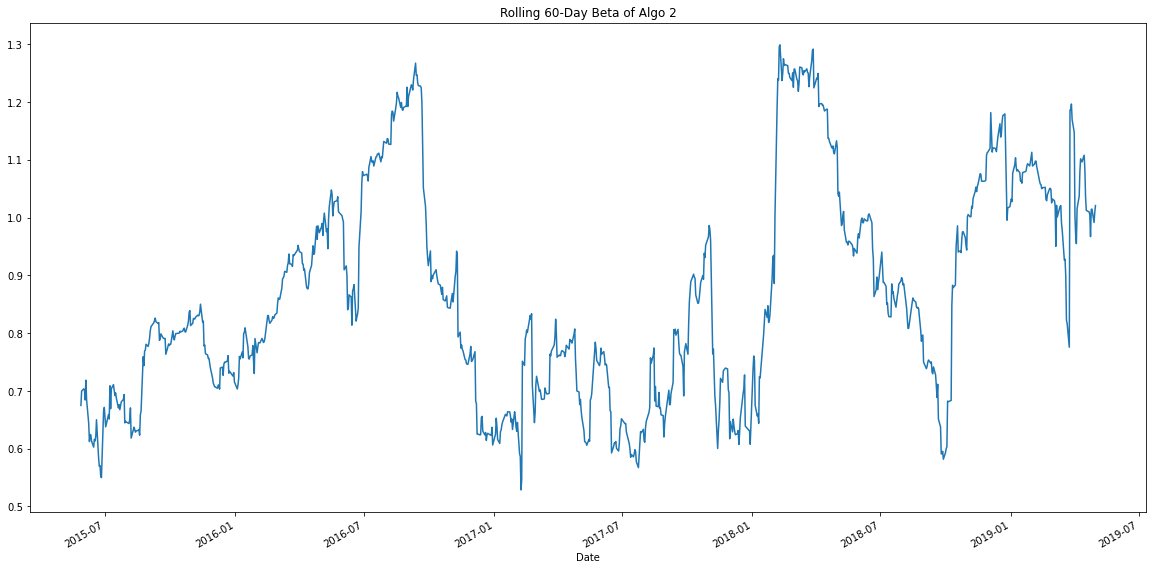

In [43]:
# Plot beta trend
ax = rolling_beta.plot(figsize=(20, 10), title= "Rolling 60-Day Beta of Algo 2")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [44]:
# Use `ewm` to calculate the rolling window
daily_return1_EMW = daily_return1.ewm(span=21).std()
daily_return1_EMW

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002658,0.004896,0.002519,0.006934,0.004182,0.002645,0.004928
2015-03-06,0.005515,0.004592,0.004808,0.009585,0.003386,0.007399,0.005286
2015-03-09,0.004716,0.004434,0.005702,0.008103,0.002929,0.006422,0.004514
...,...,...,...,...,...,...,...
2019-04-25,0.004767,0.005043,0.007945,0.007519,0.005244,0.006296,0.003693
2019-04-26,0.004939,0.005553,0.008451,0.007602,0.005078,0.006178,0.003543
2019-04-29,0.004717,0.005332,0.008217,0.007288,0.005059,0.005922,0.003421


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Annualized Sharpe Ratios
sharpe_ratios = (daily_return1.mean() * 252) / (daily_return1.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:>

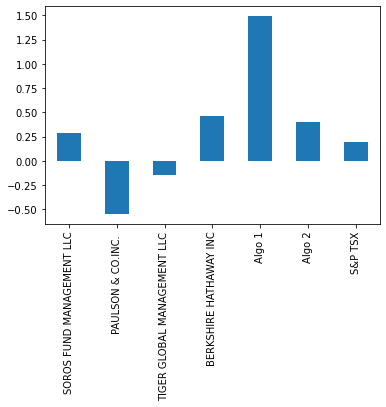

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

The algorithmic strategies outperforms both the S&P 60 and the whales portfolio

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [47]:
# Reading data from 1st stock
otex_df = pd.read_csv('otex_historical.csv')
otex_df

,Symbol,Date,Close
0,OTEX,1/2/2018,43.58
1,OTEX,1/3/2018,43.07
2,OTEX,1/4/2018,42.91
3,OTEX,1/5/2018,42.57
4,OTEX,1/8/2018,42.16
...,...,...,...
496,OTEX,12/20/2019,58.68
497,OTEX,12/23/2019,57.89
498,OTEX,12/24/2019,57.44
499,OTEX,12/27/2019,57.70


In [48]:
otex_df = otex_df.set_index(pd.to_datetime(otex_df["Date"], infer_datetime_format=True))
otex_df.head()

,Symbol,Date,Close
Date,,,
2018-01-02,OTEX,1/2/2018,43.58
2018-01-03,OTEX,1/3/2018,43.07
2018-01-04,OTEX,1/4/2018,42.91
2018-01-05,OTEX,1/5/2018,42.57
2018-01-08,OTEX,1/8/2018,42.16


In [49]:
otex_df = otex_df.drop(columns=["Date"])
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [50]:
otex_df.dtypes

Symbol     object
Close     float64
dtype: object

In [51]:
# Drop the extra columns from the DataFrame
otex_df.drop(columns=['Symbol'], inplace=True)
otex_df

,Close
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16
...,...
2019-12-20,58.68
2019-12-23,57.89
2019-12-24,57.44


In [52]:
daily_returns_otex = otex_df.pct_change()
daily_returns_otex.head()

,Close
Date,
2018-01-02,NaN
2018-01-03,-0.011703
2018-01-04,-0.003715
2018-01-05,-0.007924
2018-01-08,-0.009631


In [53]:
daily_returns_otex=daily_returns_otex.dropna().copy()
daily_returns_otex

,Close
Date,
2018-01-03,-0.011703
2018-01-04,-0.003715
2018-01-05,-0.007924
2018-01-08,-0.009631
2018-01-09,-0.000712
...,...
2019-12-20,0.024441
2019-12-23,-0.013463
2019-12-24,-0.007773


In [54]:
daily_returns_otex.dtypes

Close    float64
dtype: object

In [55]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_otex.rename(columns={'Close': 'Otex'}, inplace=True)
daily_returns_otex

,Otex
Date,
2018-01-03,-0.011703
2018-01-04,-0.003715
2018-01-05,-0.007924
2018-01-08,-0.009631
2018-01-09,-0.000712
...,...
2019-12-20,0.024441
2019-12-23,-0.013463
2019-12-24,-0.007773


In [56]:
# Reading data from 2nd stock
l_df = pd.read_csv('l_historical.csv')
l_df

,Symbol,Date,Close
0,L,1/2/2018,57.99
1,L,1/3/2018,57.41
2,L,1/4/2018,57.42
3,L,1/5/2018,57.42
4,L,1/8/2018,56.86
...,...,...,...
496,L,12/20/2019,67.90
497,L,12/23/2019,67.68
498,L,12/24/2019,67.67
499,L,12/27/2019,67.78


In [57]:
l_df = l_df.set_index(pd.to_datetime(l_df["Date"], infer_datetime_format=True))
l_df.head()

,Symbol,Date,Close
Date,,,
2018-01-02,L,1/2/2018,57.99
2018-01-03,L,1/3/2018,57.41
2018-01-04,L,1/4/2018,57.42
2018-01-05,L,1/5/2018,57.42
2018-01-08,L,1/8/2018,56.86


In [58]:
l_df = l_df.drop(columns=["Date"])
l_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [59]:
# Drop the extra columns from the DataFrame
l_df.drop(columns=['Symbol'], inplace=True)
l_df

,Close
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86
...,...
2019-12-20,67.90
2019-12-23,67.68
2019-12-24,67.67


In [60]:
daily_returns_l = l_df.pct_change()
daily_returns_l.head()

,Close
Date,
2018-01-02,NaN
2018-01-03,-0.010002
2018-01-04,0.000174
2018-01-05,0.000000
2018-01-08,-0.009753


In [61]:
daily_returns_l=daily_returns_l.dropna().copy()
daily_returns_l

,Close
Date,
2018-01-03,-0.010002
2018-01-04,0.000174
2018-01-05,0.000000
2018-01-08,-0.009753
2018-01-09,0.008969
...,...
2019-12-20,0.003547
2019-12-23,-0.003240
2019-12-24,-0.000148


In [62]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_l.rename(columns={'Close': 'L'}, inplace=True)
daily_returns_l

,L
Date,
2018-01-03,-0.010002
2018-01-04,0.000174
2018-01-05,0.000000
2018-01-08,-0.009753
2018-01-09,0.008969
...,...
2019-12-20,0.003547
2019-12-23,-0.003240
2019-12-24,-0.000148


In [63]:
daily_returns_otex.dtypes

Otex    float64
dtype: object

In [64]:

# Reading data from 3rd stock
shop_df = pd.read_csv('shop_historical.csv')
shop_df

,Symbol,Date,Close
0,SHOP,1/2/2018,132.06
1,SHOP,1/3/2018,135.15
2,SHOP,1/4/2018,137.46
3,SHOP,1/5/2018,137.26
4,SHOP,1/8/2018,139.51
...,...,...,...
496,SHOP,12/20/2019,513.22
497,SHOP,12/23/2019,511.62
498,SHOP,12/24/2019,525.39
499,SHOP,12/27/2019,534.76


In [65]:
shop_df = shop_df.set_index(pd.to_datetime(shop_df["Date"], infer_datetime_format=True))
shop_df.head()

,Symbol,Date,Close
Date,,,
2018-01-02,SHOP,1/2/2018,132.06
2018-01-03,SHOP,1/3/2018,135.15
2018-01-04,SHOP,1/4/2018,137.46
2018-01-05,SHOP,1/5/2018,137.26
2018-01-08,SHOP,1/8/2018,139.51


In [66]:
shop_df = shop_df.drop(columns=["Date"])
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [67]:
# Drop the extra columns from the DataFrame
shop_df.drop(columns=['Symbol'], inplace=True)
shop_df

,Close
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51
...,...
2019-12-20,513.22
2019-12-23,511.62
2019-12-24,525.39


In [68]:
daily_returns_shop = shop_df.pct_change()
daily_returns_shop.head()

,Close
Date,
2018-01-02,NaN
2018-01-03,0.023398
2018-01-04,0.017092
2018-01-05,-0.001455
2018-01-08,0.016392


In [69]:
daily_returns_shop = daily_returns_shop.dropna().copy()
daily_returns_shop

,Close
Date,
2018-01-03,0.023398
2018-01-04,0.017092
2018-01-05,-0.001455
2018-01-08,0.016392
2018-01-09,-0.011254
...,...
2019-12-20,-0.005503
2019-12-23,-0.003118
2019-12-24,0.026915


In [70]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_shop.rename(columns={'Close': 'Shop'}, inplace=True)
daily_returns_shop

,Shop
Date,
2018-01-03,0.023398
2018-01-04,0.017092
2018-01-05,-0.001455
2018-01-08,0.016392
2018-01-09,-0.011254
...,...
2019-12-20,-0.005503
2019-12-23,-0.003118
2019-12-24,0.026915


In [71]:
# Combine all stocks in a single DataFrame
daily_return = pd.concat(
    [daily_returns_otex, daily_returns_l, daily_returns_shop], axis="columns", join="inner"
)
daily_return.head()

,Otex,L,Shop
Date,,,
2018-01-03,-0.011703,-0.010002,0.023398
2018-01-04,-0.003715,0.000174,0.017092
2018-01-05,-0.007924,0.000000,-0.001455
2018-01-08,-0.009631,-0.009753,0.016392
2018-01-09,-0.000712,0.008969,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [72]:
# Set weights
otex_weight = 1/3
shop_weight =1/3
l_weight = 1/3
# Calculate portfolio return
portfolio_returns = otex_weight * daily_return["Otex"] + l_weight * daily_return["L"] + shop_weight *daily_return["Shop"]
# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [74]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns = pd.concat(
    [daily_return, portfolio_returns], axis="columns", join="inner"
)
daily_returns.head()

,Otex,L,Shop,0
Date,,,,
2018-01-03,-0.011703,-0.010002,0.023398,0.000565
2018-01-04,-0.003715,0.000174,0.017092,0.004517
2018-01-05,-0.007924,0.000000,-0.001455,-0.003126
2018-01-08,-0.009631,-0.009753,0.016392,-0.000997
2018-01-09,-0.000712,0.008969,-0.011254,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [76]:
# Calculate the annualized `std`
daily_std1 = daily_returns.std()
daily_std1.head()
annualized_std1 = daily_std1 * np.sqrt(252)
annualized_std1.head()

Otex    0.215132
L       0.152369
Shop    0.488717
0       0.216794
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

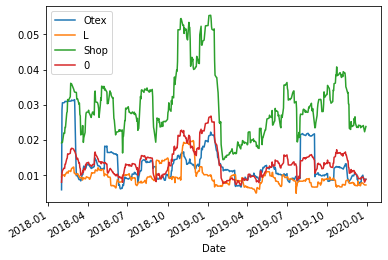

In [77]:
# Calculate rolling standard deviation
daily_returns.rolling(window=21).std()
# Plot rolling standard deviation
daily_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

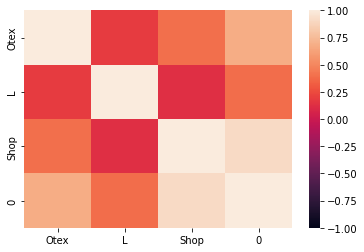

In [88]:
# Calculate and plot the correlation
correlation1 = daily_returns.corr()
sns.heatmap(correlation1, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [92]:
# Calculate 60-day rolling covariance of social media stocks vs. S&P 60 and plot the data
rolling_otex_covariance = daily_returns["Otex"].rolling(window=60).cov(daily_return1['S&P TSX'])
rolling_l_covariance = daily_returns["L"].rolling(window=60).cov(daily_return1['S&P TSX'])
rolling_shop_covariance = daily_returns["Shop"].rolling(window=60).cov(daily_return1['S&P TSX'])

# Calculate 60-day rolling variance of S&P 500
rolling_variance = daily_return1['S&P TSX'].rolling(window=60).var()

# Calculate 60-day rolling beta of social media stocks and plot the data
rolling_otex_beta = rolling_otex_covariance / rolling_variance
rolling_l_beta = rolling_l_covariance / rolling_variance
rolling_shop_beta = rolling_shop_covariance / rolling_variance 

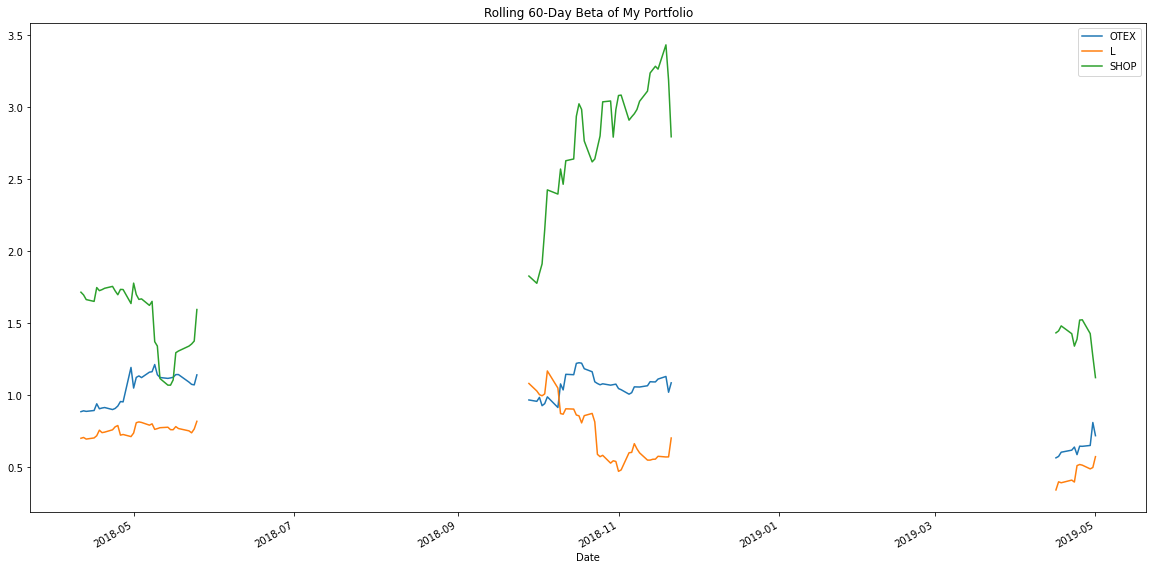

In [94]:
# Set the figure and plot my portfolio's beta values as multiple trends on the same figure
ax = rolling_otex_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of My Portfolio")
rolling_l_beta.plot(ax=ax)
rolling_shop_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["OTEX", "L", "SHOP"]) 

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [82]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios1 = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios1

Otex    0.743512
L       0.570084
Shop    1.655513
0       1.623501
dtype: float64

<AxesSubplot:>

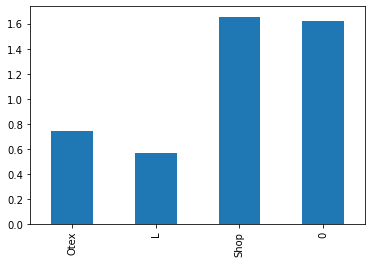

In [83]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios1.plot.bar()

### How does your portfolio do?

L is the most conervative stock with the least beta and sharpe ratio. SHOP HAS THE highest beta which means it has greater risk, and also greater
expected returns. Otex is a little bit higher than L.